# Numberphile 277777788888899

https://www.youtube.com/watch?v=Wim9WJeDTHQ

In [1]:
using BenchmarkTools
using DataStructures
using Plots

In [2]:
function fun(n::Int64, steps::Vector{Int64}=Int64[])::Tuple{Int64, Vector{Int64}}

    s = string(n)

    if length(s) == 1
        push!(steps, n)
        return length(steps) - 1, steps
    else
        push!(steps, parse(Int64, s))
        digits = [parse(Int64, i) for i in s]
        result = 1
        for d in digits
            result *= d
        end
    end

    fun(result, steps)

end

fun (generic function with 2 methods)

In [3]:
# Demo
fun(5428)

(2, [5428, 320, 0])

In [4]:
# Demo
fun(327)

(2, [327, 42, 8])

In [5]:
# Demo
fun(277777788888899)

(11, [277777788888899, 4996238671872, 438939648, 4478976, 338688, 27648, 2688, 768, 336, 54, 20, 0])

In [6]:
# Benchmark
@benchmark fun(277777788888899)

BenchmarkTools.Trial: 10000 samples with 10 evaluations.
 Range (min … max):  1.246 μs … 343.637 μs  ┊ GC (min … max):  0.00% … 99.28%
 Time  (median):     1.317 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   1.538 μs ±   7.710 μs  ┊ GC (mean ± σ):  12.25% ±  2.43%

     █▅▆█▁ ▁                                                   
  ▂▃▇███████▆▆█▆▅▆▄▅▅▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂ ▃
  1.25 μs         Histogram: frequency by time        1.82 μs <

 Memory estimate: 2.77 KiB, allocs estimate: 38.

In [7]:
function fun_fast(n::Int64, counter::Int64=0)::Int64

    s = string(n)

    if length(s) == 1
        return counter
    else
        digits = [parse(Int64, i) for i in s]
        counter += 1
        result = 1
        @simd for d in digits
            result *= d
        end
    end

    fun_fast(result, counter)

end

fun_fast (generic function with 2 methods)

In [8]:
# Demo
fun_fast(5428)

2

In [9]:
# Demo
fun_fast(237)

2

In [10]:
# Demo
fun(277777788888899)

(11, [277777788888899, 4996238671872, 438939648, 4478976, 338688, 27648, 2688, 768, 336, 54, 20, 0])

In [11]:
# Benchmark
@benchmark fun_fast(277777788888899)

BenchmarkTools.Trial: 10000 samples with 30 evaluations.
 Range (min … max):  913.867 ns … 137.194 μs  ┊ GC (min … max):  0.00% … 99.11%
 Time  (median):     973.600 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.159 μs ±   4.312 μs  ┊ GC (mean ± σ):  14.36% ±  3.83%

    ▁██▄▂▁▂▁                                                     
  ▁▃████████▇▆█▇▆▆▄▄▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  914 ns           Histogram: frequency by time         1.35 μs <

 Memory estimate: 2.30 KiB, allocs estimate: 35.

In [12]:
n, m = 1, 1_000_000

vec = Vector{Int64}()
for num in n:m
    push!(vec, fun_fast(num))
end

max_val = maximum(vec)

println("Max value : ", max_val)

max_values = findall(x -> x == max_val, vec)


Max value : 7


2450-element Vector{Int64}:
  68889
  68898
  68988
  69888
  86889
  86898
  86988
  88689
  88698
  88869
      ⋮
 997374
 997437
 997473
 997627
 997672
 997726
 997734
 997743
 997762

In [13]:
fun(max_values[begin])

(7, [68889, 27648, 2688, 768, 336, 54, 20, 0])

In [14]:
fun(max_values[end])

(7, [997762, 47628, 2688, 768, 336, 54, 20, 0])

In [15]:
@which counter

DataStructures

In [16]:
cnt = counter(vec)

Accumulator{Int64, Int64} with 8 entries:
  0 => 9
  4 => 66772
  5 => 24654
  6 => 4488
  2 => 375227
  7 => 2450
  3 => 123860
  1 => 402540

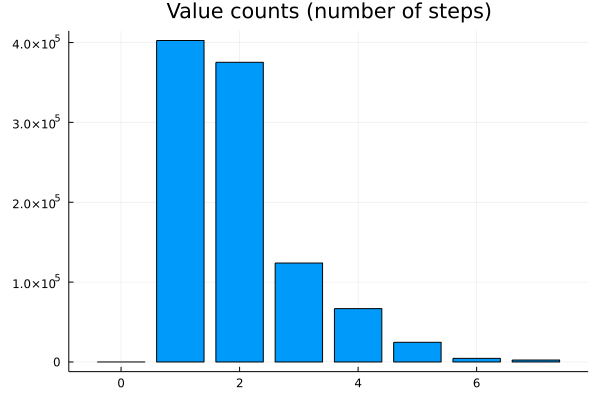

In [17]:
bar(cnt, label=false, title="Value counts (number of steps)")